In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
train_df = pd.read_csv("data/train.csv", index_col=0)
test_df = pd.read_csv("data/test.csv", index_col=0)

In [34]:
hazards = train_df.Hazard
summary = stats.describe(hazards)
print min(hazards), max(hazards)
print "Mean: {0}\nVariance: {1}\nTotal number of observations: {2}".format(summary.mean, summary.variance, summary.nobs)

1 69
Mean: 4.02278476049
Variance: 16.1699973354
Total number of observations: 50999


(1, 1000)

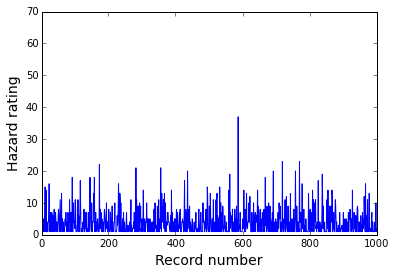

In [37]:
plt.plot(range(len(hazards)), hazards)
plt.xlabel("Record number", fontsize=14)
plt.ylabel("Hazard rating", fontsize=14)
plt.xlim(1,1000)

In [33]:
help(plt.plot)

Help on function plot in module matplotlib.pyplot:

plot(*args, **kwargs)
    Plot lines and/or markers to the
    :class:`~matplotlib.axes.Axes`.  *args* is a variable length
    argument, allowing for multiple *x*, *y* pairs with an
    optional format string.  For example, each of the following is
    legal::
    
        plot(x, y)        # plot x and y using default line style and color
        plot(x, y, 'bo')  # plot x and y using blue circle markers
        plot(y)           # plot y using x as index array 0..N-1
        plot(y, 'r+')     # ditto, but with red plusses
    
    If *x* and/or *y* is 2-dimensional, then the corresponding columns
    will be plotted.
    
    An arbitrary number of *x*, *y*, *fmt* groups can be
    specified, as in::
    
        a.plot(x1, y1, 'g^', x2, y2, 'g-')
    
    Return value is a list of lines that were added.
    
    By default, each line is assigned a different color specified by a
    'color cycle'.  To change this behavior, you can 